In [37]:
#About the dataset:
#The challenge has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. 
#The data columns include the open date, location, city type, and three categories of anonymous data: Demographic data, Real estate data, and Commercial data.
#The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis.

In [38]:
import pandas as pd
import numpy as np

In [39]:
import os

In [40]:
my_train = pd.read_csv("train.csv")
my_test = pd.read_csv("test_restaurant.csv")
my_sample = pd.read_csv("sampleSubmission.csv")


In [41]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
my_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [43]:
my_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [44]:
print("Train :",my_train.shape)
print("Test:",my_test.shape)

Train : (137, 43)
Test: (100000, 42)


In [45]:
my_train['Open Date'] = pd.to_datetime(my_train['Open Date'])
my_test['Open Date'] = pd.to_datetime(my_test['Open Date'])

In [46]:
my_train.columns[my_train.isna().any()].tolist()

[]

In [47]:
my_test.columns[my_test.isna().any()].tolist()

[]

In [48]:
# There are no missing values.
# Last column 'revenue' is our target column.
# Features from P1 to P37 are all numerical features about which we know nothing specifically. So, we are directly feeding them into the model.
# Id column is redundant, We will drop it.
# City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable form which is numerical form.

In [49]:
my_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [50]:
my_train.drop('Id',axis=1,inplace=True)

c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


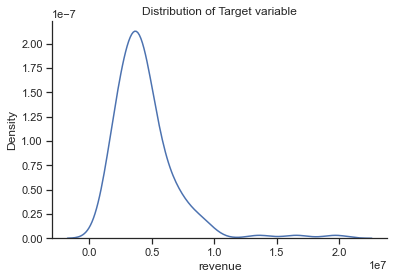

In [51]:
sns.distplot(my_train['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine(); #to remove top and right spines

In [52]:
# Remove the outliers to make the model more efficient

In [53]:
my_train = my_train[my_train['revenue']<8e+06].copy()

In [54]:
my_train.shape

(128, 42)

c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


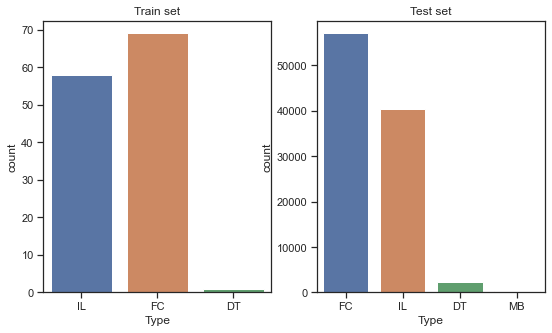

In [55]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(my_train.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(my_test.Type,ax=ax[1])
ax[1].set_title('Test set');

In [56]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([my_train,my_test],axis=0)

# Extracting month and year from date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


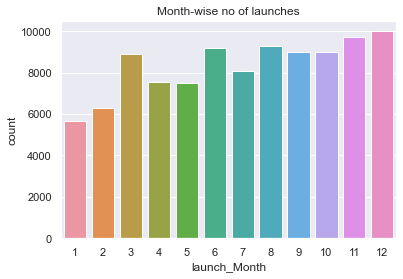

In [57]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches');

In [58]:
# Second half of the year seems to witness more restaurant launches.

c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


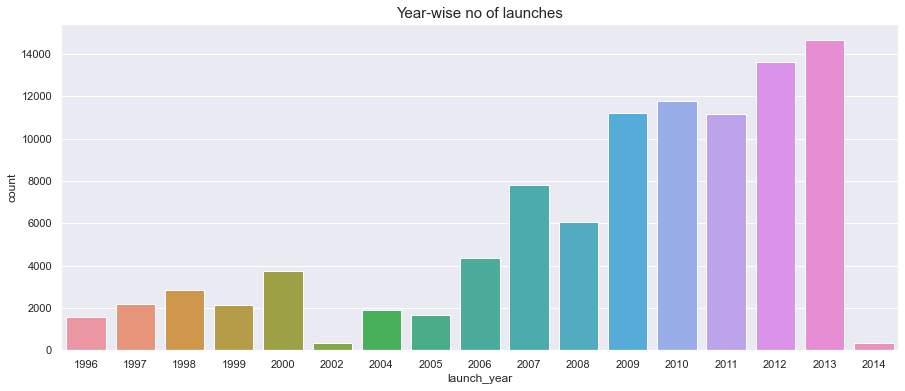

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [60]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [61]:
df['City Group'].value_counts()

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [62]:
df['City'].value_counts()

İstanbul     34130
Ankara        8739
İzmir         6472
Antalya       5915
Kocaeli       4365
             ...  
Kastamonu        1
Karabük          1
Tokat            1
Amasya           1
Elazığ           1
Name: City, Length: 63, dtype: int64

In [63]:
# There are 63 different City values
# Here, We are dropping this column as there is not much information about which countries are involved.
# Also, the feature City Group covers effect of this feature as well.

In [64]:
df.drop('City',axis=1,inplace=True)

In [65]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [66]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [67]:
# Revenue is a bit higher in months of Jan, Sept and Oct.

In [68]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [69]:
# Year 1999 has recorded highest revenues.
# Years 2000, 2013 and 2014 proved to be worst years for restaurants.

In [70]:
# creating dummy variables
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [71]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [72]:
processed_df.shape,processed_test_data.shape

((128, 70), (100000, 69))

In [73]:
#Check it once
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,1,4,5.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,1,0,0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,...,0,0,1,0,0,0,0,0,0,0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,1,0,0,0,0,0,0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,...,0,0,1,0,0,0,0,0,0,0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,...,0,0,0,0,0,1,0,0,0,0


In [74]:
#Split train data further into training and testing sets to see performance of each ML model. Then, apply models.

In [75]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

c:\users\tushar agrawal\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MAE,MSE,R2-score
Linear Regression,1.904764e+06,5.764211e+12,-1.274732
Logistic Regression,1.302039e+06,2.478689e+12,0.021835
Decision Tree,1.487394e+06,3.160418e+12,-0.247196
Random Forest,1.163913e+06,2.111138e+12,0.166881
Support Vector Machines,1.407327e+06,2.555855e+12,-0.008618
K-nearest Neighbors,1.138622e+06,1.816654e+12,0.283094
XGBoost,1.057680e+06,1.946986e+12,0.231661


In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [.03, 0.05, .07,.09], #so called `eta` value
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
0.06930389378023838
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}


In [78]:
xgb=XGBRegressor(colsample_bytree=0.7,learning_rate=0.05,max_depth=7,min_child_weight=4,
                n_estimators=500,subsample=0.7)
xgb.fit(X,y)
predicted_test_values = xgb.predict(processed_test_data)
submission1 = pd.DataFrame(columns=['Id','Prediction'])
submission1['Id'] = my_test['Id']
submission1['Prediction'] = predicted_test_values
submission1.to_csv('submission_xgb.csv',index=False)

In [79]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
predicted_test_values2 = knn.predict(processed_test_data)
submission2 = pd.DataFrame(columns=['Id','Prediction'])
submission2['Id'] = my_test['Id']
submission2['Prediction'] = predicted_test_values2
submission2.to_csv('submission_knn.csv',index=False)